In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


Reading the csv file

In [3]:
def readData(filename):
    df = pd.read_csv(filename,sep=';', low_memory=False)
    return df

filename='scimagojr2017.csv'
df = readData(filename)
df

,Rank,Sourceid,Title,Type,Issn,SJR,SJR Best Quartile,H index,Total Docs. (2017),Total Docs. (3years),Total Refs.,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Publisher,Categories
0,1,28773,CA - A Cancer Journal for Clinicians,journal,"15424863, 00079235","61,786",Q1,137,43,130,3160,16834,109,"198,90","73,49",United States,Wiley-Blackwell,Hematology (Q1); Oncology (Q1)
1,2,18991,Nature Reviews Genetics,journal,"14710056, 14710064","34,896",Q1,307,108,429,7108,7296,167,"38,94","65,81",United Kingdom,Nature Publishing Group,Genetics (Q1); Genetics (clinical) (Q1); Molec...
2,3,19434,MMWR. Recommendations and reports : Morbidity ...,journal,"10575987, 15458601","34,638",Q1,125,2,16,184,996,16,"76,00","92,00",United States,Centers for Disease Control and Prevention (CDC),Epidemiology (Q1); Health Information Manageme...
3,4,58530,National vital statistics reports : from the C...,journal,"15518930, 15518922","33,557",Q1,85,6,31,207,1096,31,"40,75","34,50",United States,US Department of Health and Human Services,Life-span and Life-course Studies (Q1)
4,5,20315,Nature Reviews Molecular Cell Biology,journal,"14710072, 14710080","32,714",Q1,372,112,428,7278,8741,206,"29,64","64,98",United Kingdom,Nature Publishing Group,Cell Biology (Q1); Molecular Biology (Q1)
5,6,29431,Quarterly Journal of Economics,journal,"00335533, 15314650","29,602",Q1,219,43,121,2210,1280,120,"8,26","51,40",United States,Oxford University Press,Economics and Econometrics (Q1)
6,7,21318,Nature Reviews Immunology,journal,14741733,"28,786",Q1,332,141,465,8241,7943,184,"39,55","58,45",United Kingdom,Nature Publishing Group,Immunology (Q1); Medicine (miscellaneous) (Q1)
7,8,21100812243,Nature Reviews Materials,journal,20588437,"28,630",Q1,33,91,102,7110,2619,56,"46,77","78,13",United Kingdom,Nature Publishing Group,"Biomaterials (Q1); Electronic, Optical and Mag..."
8,9,18434,Cell,journal,"00928674, 10974172","25,137",Q1,682,547,1978,27123,43114,1734,"23,61","49,59",United States,Cell Press,"Biochemistry, Genetics and Molecular Biology (..."
9,10,19700180594,Handbook of International Economics,book series,15734404,"25,020",Q1,9,0,15,0,176,12,"14,67","0,00",Netherlands,North-Holland Publ Co,"Economics and Econometrics (Q1); Economics, Ec..."


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34171 entries, 0 to 34170
Data columns (total 18 columns):
Rank                      34171 non-null int64
Sourceid                  34171 non-null int64
Title                     34171 non-null object
Type                      34171 non-null object
Issn                      34171 non-null object
SJR                       32596 non-null object
SJR Best Quartile         34171 non-null object
H index                   34171 non-null int64
Total Docs. (2017)        34171 non-null int64
Total Docs. (3years)      34171 non-null int64
Total Refs.               34171 non-null int64
Total Cites (3years)      34171 non-null int64
Citable Docs. (3years)    34171 non-null int64
Cites / Doc. (2years)     34171 non-null object
Ref. / Doc.               34171 non-null object
Country                   34169 non-null object
Publisher                 25433 non-null object
Categories                34171 non-null object
dtypes: int64(8), object(10)
memory

Calling head() attribute returns0 the first five items of the dataframe.

In [27]:
import plotly

plotly.tools.set_credentials_file(username='sjha', api_key='nLlSXF5U8oOBIGYJNAQ1')

In [107]:
import plotly.plotly as py
import cufflinks as cf

cf.set_config_file(offline=False, world_readable=True, theme='pearl')

df.iplot(kind='bubble', x='H index', y='Total Cites (3years)', size='Total Docs. (3years)', text='Country',
             xTitle='H-index', yTitle='Total cites',
             filename='Hindex_vs_totalCites')

The draw time for this plot will be slow for clients without much RAM.


C:\Users\sjha\AppData\Local\Continuum\anaconda3\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Slow



C:\Users\sjha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



965      16
1157      1
3296      8
3732     30
4145     36
4790      8
5223     39
5657     15
5746     18
5759     16
6415     17
6486     20
6684     10
6897     40
7142     33
7204     72
7267     62
7409      5
7551     23
7629     17
7738     23
7837     21
7838     33
7873     63
8079     20
8150     25
8170     24
8305     15
8395     35
8636     23
         ..
31243     4
31250     2
31299    10
31440     2
31472     7
31481     1
31625     4
31732     3
31751     2
31817     4
31999     3
32130     2
32241     2
32278     1
32319     4
32380     2
32420     9
32475     1
33048     1
33288    25
33289     0
33324     1
33326     0
33331     7
33370     0
33395     5
33432    11
33433    11
33596     2
34106    11
Name: H index, Length: 524, dtype: int64


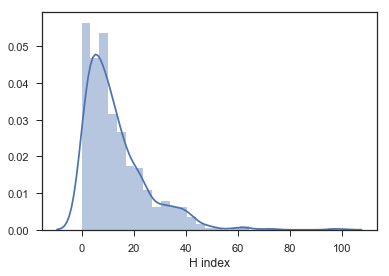

In [105]:
sns.distplot(df.loc[df['Country'] == 'India']['H index'].dropna(), kde=True)
print(df.loc[df['Country'] == 'India']['H index'].dropna())

array(['journal', 'book series', 'conference and proceedings',
       'trade journal'], dtype=object)

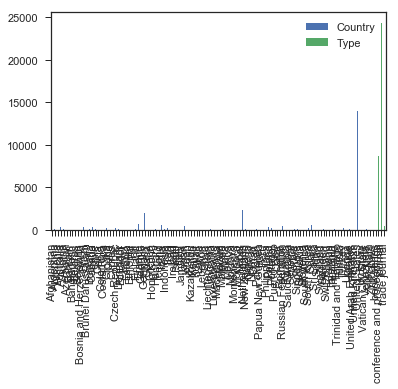

In [102]:
df[['Country', 'Type']].apply(pd.value_counts).plot(kind='bar')
df.Type.unique()

<Figure size 720x576 with 0 Axes>

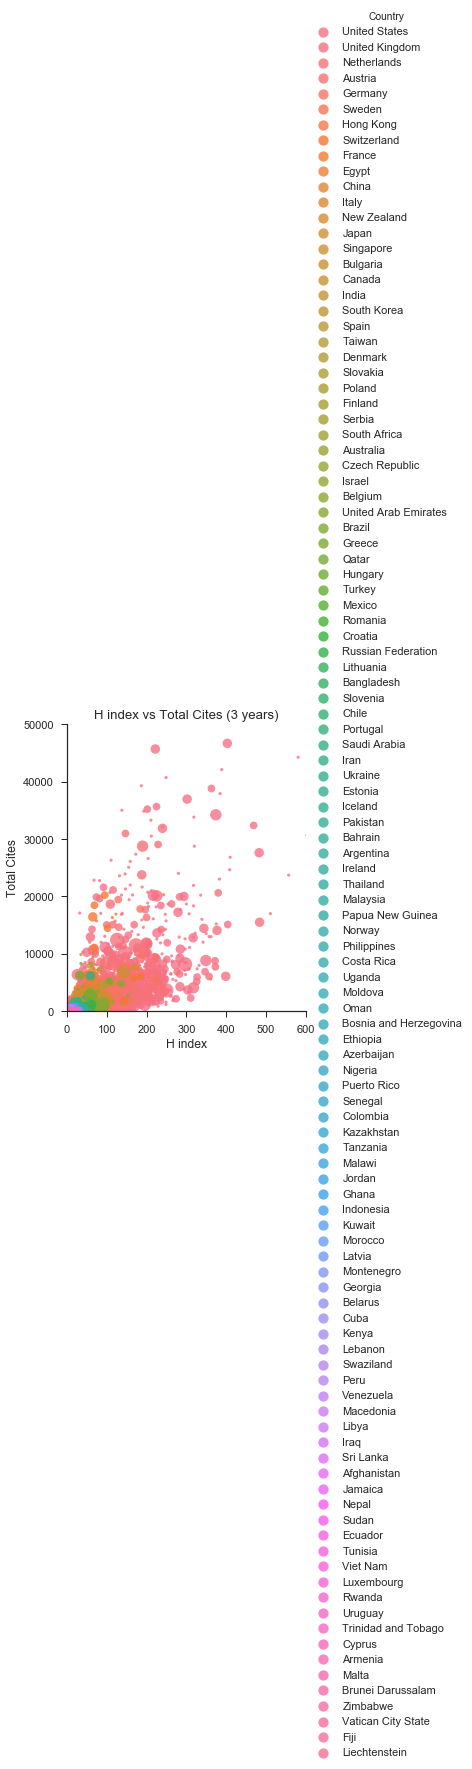

In [63]:

plt.figure(figsize=(10,8))
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sizes = [10, 60, 90, 130, 200] 
marker_size = pd.cut(df['Total Docs. (3years)']/10, [0, 40, 80, 120, 160, 200], labels=sizes)
sns.lmplot('H index', 'Total Cites (3years)', data=df, hue='Country', fit_reg=False, scatter_kws={'s':marker_size})
plt.title('H index vs Total Cites (3 years)')
plt.xlabel('H index')
plt.ylabel('Total Cites')
plt.ylim((0, 50000))
plt.xlim((0, 600))
plt.savefig('sns.png')

C:\Users\sjha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Users\sjha\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



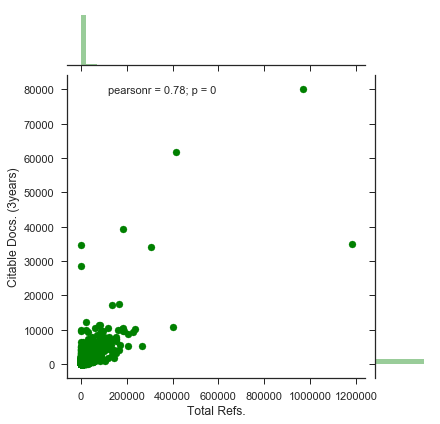

In [119]:
sns.jointplot(data=df, x='Total Refs.', y='Citable Docs. (3years)', kind='scatter', color='g')
plt.show()

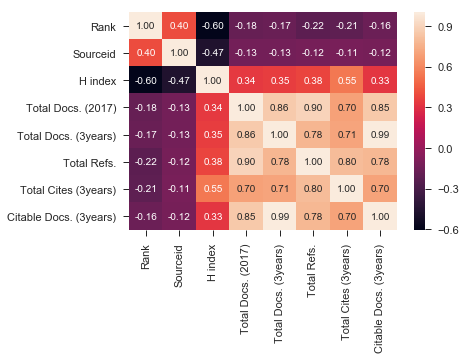

In [124]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

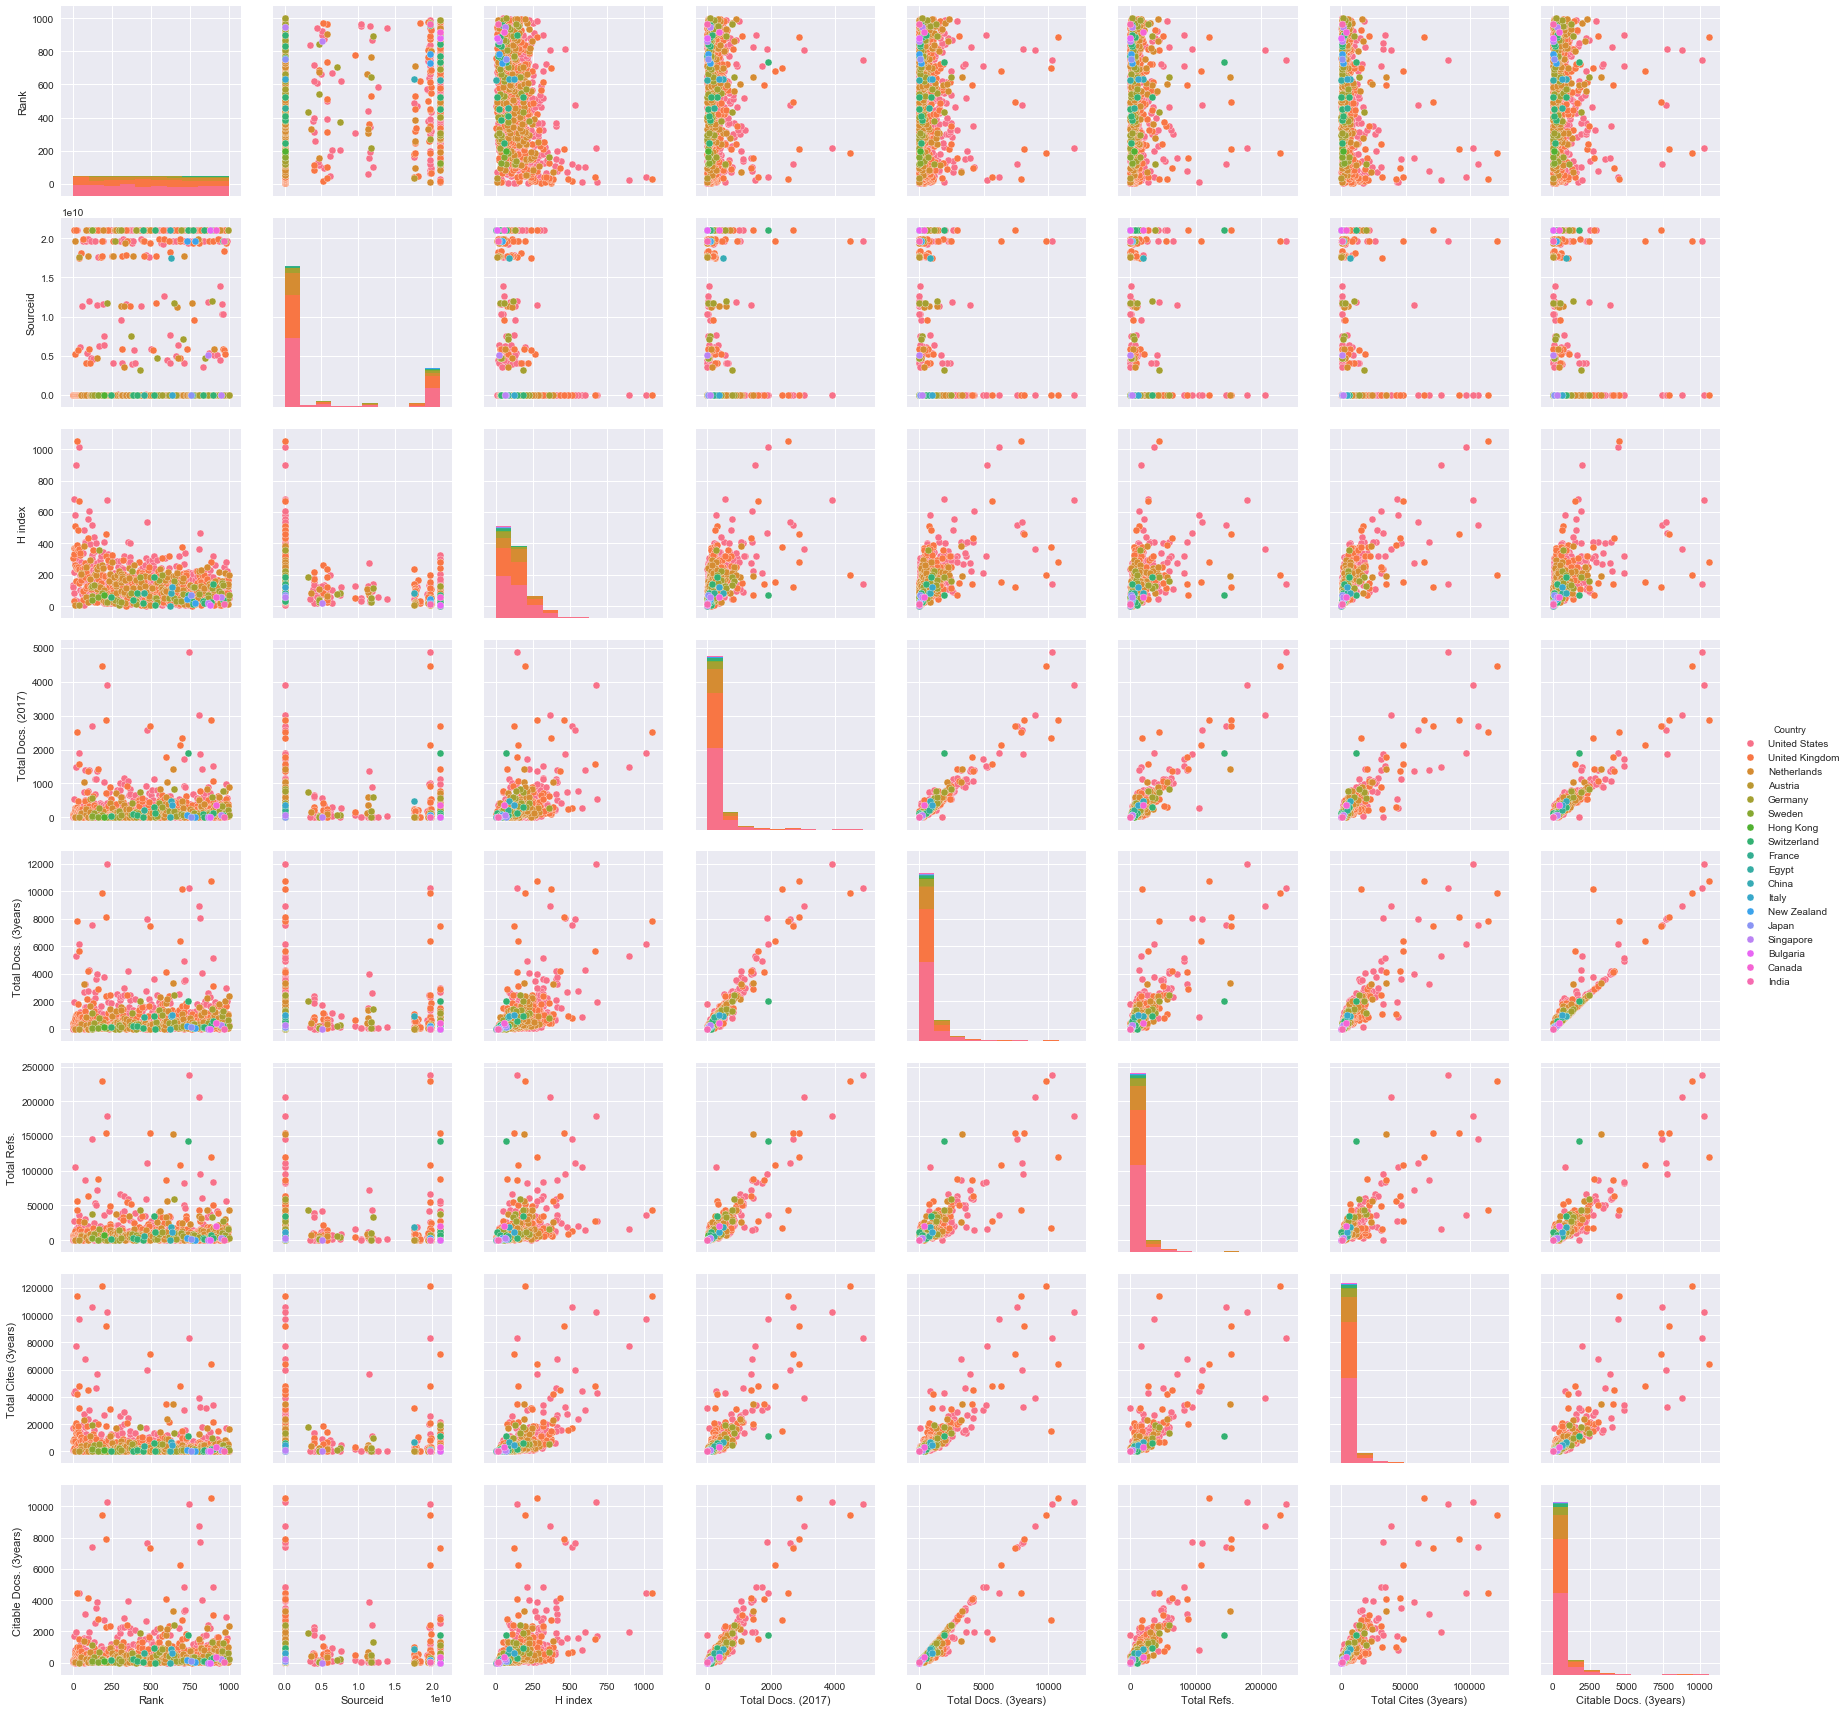

In [134]:
sns.set()
sns.pairplot(df[:1000], hue='Country', size=3)

In [70]:
pd.DataFrame(df.Categories.str.split(';', expand=True), columns = [])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Hematology (Q1),Oncology (Q1),None,None,None,None,None,None,None,None,None,None,None
1,Genetics (Q1),Genetics (clinical) (Q1),Molecular Biology (Q1),None,None,None,None,None,None,None,None,None,None
2,Epidemiology (Q1),Health Information Management (Q1),Health (social science) (Q1),"Health, Toxicology and Mutagenesis (Q1)",Medicine (miscellaneous) (Q1),None,None,None,None,None,None,None,None
3,Life-span and Life-course Studies (Q1),None,None,None,None,None,None,None,None,None,None,None,None
4,Cell Biology (Q1),Molecular Biology (Q1),None,None,None,None,None,None,None,None,None,None,None
5,Economics and Econometrics (Q1),None,None,None,None,None,None,None,None,None,None,None,None
6,Immunology (Q1),Medicine (miscellaneous) (Q1),None,None,None,None,None,None,None,None,None,None,None
7,Biomaterials (Q1),"Electronic, Optical and Magnetic Materials (Q1)",Energy (miscellaneous) (Q1),Materials Chemistry (Q1),"Surfaces, Coatings and Films (Q1)",None,None,None,None,None,None,None,None
8,"Biochemistry, Genetics and Molecular Biology (...",None,None,None,None,None,None,None,None,None,None,None,None
9,Economics and Econometrics (Q1),"Economics, Econometrics and Finance (miscella...",Finance (Q1),Political Science and International Relations...,None,None,None,None,None,None,None,None,None


In [4]:
new_df = pd.DataFrame(df.Categories.str.split(';').tolist(), index=df.Country).stack()
new_df = new_df.reset_index()[[0, 'Country']] # categories variable is currently labeled 0
new_df.columns = ['Categories', 'Country'] # renaming categories
new_df = new_df.dropna()
new_df.info()
new_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79156 entries, 0 to 79160
Data columns (total 2 columns):
Categories    79156 non-null object
Country       79156 non-null object
dtypes: object(2)
memory usage: 1.8+ MB


,Categories,Country
0,Hematology (Q1),United States
1,Oncology (Q1),United States
2,Genetics (Q1),United Kingdom
3,Genetics (clinical) (Q1),United Kingdom
4,Molecular Biology (Q1),United Kingdom


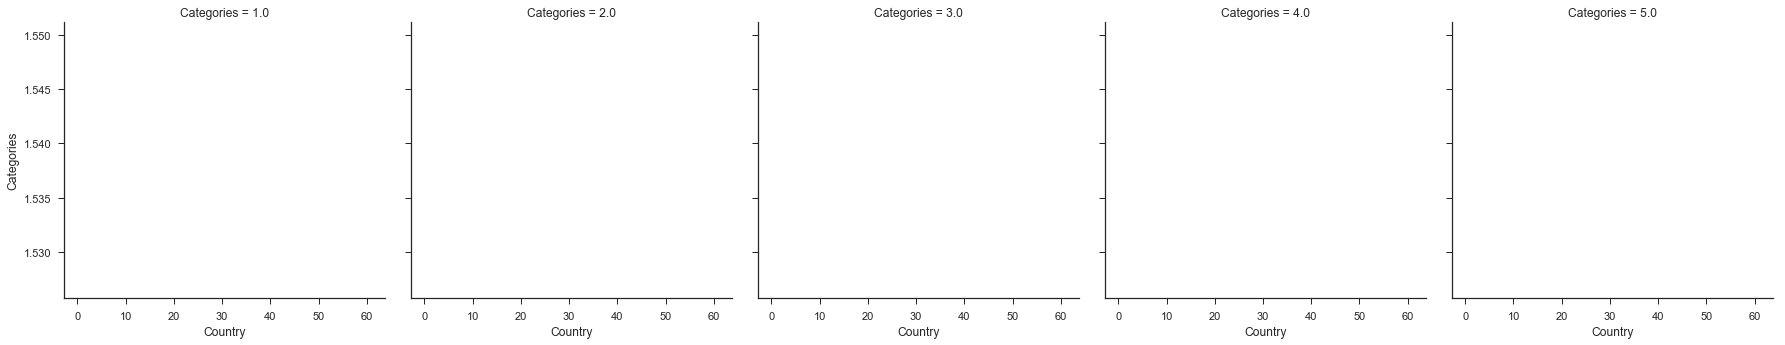

In [17]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# # Create scatterplot of dataframe
sns.lmplot('Country', # Horizontal axis
           'Categories', # Vertical axis
           data=new_df[:100].apply(pd.value_counts), # Data source
           col='Categories',
           fit_reg=False)

# new_df[:100].apply(pd.value_counts).plot(kind='bar', subplots=True)

# newer_df.apply(pd.value_counts).plot.scatter(x='Country',y='Categories',c='DarkBlue')

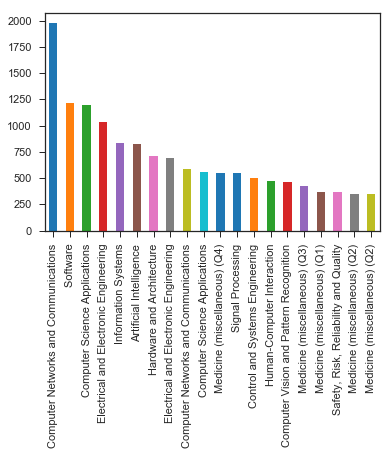

In [33]:
fig, ax = plt.subplots()
new_df['Categories'].value_counts()[:20].plot(ax=ax, kind='bar')